# 🛒 Big Mart Sales Data Analysis

This notebook presents a structured analysis of the Big Mart sales dataset, focusing on product and outlet characteristics. The goal is to clean, explore, and visualize the data to uncover patterns and insights.

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# For cleaner visuals
sns.set(style='whitegrid')

# **Load the Dataset**

In [18]:
df = pd.read_csv('/content/Test.csv')
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [19]:
df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type'],
      dtype='object')

In [20]:
df.shape

(5681, 11)

In [21]:
df.dtypes

,0
Item_Identifier,object
Item_Weight,float64
Item_Fat_Content,object
Item_Visibility,float64
Item_Type,object
Item_MRP,float64
Outlet_Identifier,object
Outlet_Establishment_Year,int64
Outlet_Size,object
Outlet_Location_Type,object


In [22]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
count,4705.000000,5681.000000,5681.000000,5681.000000
mean,12.695633,0.065684,141.023273,1997.828903
std,4.664849,0.051252,61.809091,8.372256
min,4.555000,0.000000,31.990000,1985.000000
25%,8.645000,0.027047,94.412000,1987.000000
50%,12.500000,0.054154,141.415400,1999.000000
75%,16.700000,0.093463,186.026600,2004.000000
max,21.350000,0.323637,266.588400,2009.000000


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                4705 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                4075 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


In [24]:
df.isnull().sum()

,0
Item_Identifier,0
Item_Weight,976
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Identifier,0
Outlet_Establishment_Year,0
Outlet_Size,1606
Outlet_Location_Type,0


In [25]:
df.describe(include='all')

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
count,5681,4705.000000,5681,5681.000000,5681,5681.000000,5681,5681.000000,4075,5681,5681
unique,1543,NaN,5,NaN,16,NaN,10,NaN,3,3,4
top,FDQ60,NaN,Low Fat,NaN,Snack Foods,NaN,OUT027,NaN,Medium,Tier 3,Supermarket Type1
freq,8,NaN,3396,NaN,789,NaN,624,NaN,1862,2233,3717
mean,NaN,12.695633,NaN,0.065684,NaN,141.023273,NaN,1997.828903,NaN,NaN,NaN
std,NaN,4.664849,NaN,0.051252,NaN,61.809091,NaN,8.372256,NaN,NaN,NaN
min,NaN,4.555000,NaN,0.000000,NaN,31.990000,NaN,1985.000000,NaN,NaN,NaN
25%,NaN,8.645000,NaN,0.027047,NaN,94.412000,NaN,1987.000000,NaN,NaN,NaN
50%,NaN,12.500000,NaN,0.054154,NaN,141.415400,NaN,1999.000000,NaN,NaN,NaN
75%,NaN,16.700000,NaN,0.093463,NaN,186.026600,NaN,2004.000000,NaN,NaN,NaN


# **Data Cleaning**

In [26]:
df.duplicated().sum()

np.int64(0)

In [27]:
# non useful data
del df['Item_Identifier']

In [75]:
df = df.sort_values(by='Outlet_Establishment_Year', ascending=True) # Arranging the data in Ascending ordr

In [32]:
df.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,NaN,Low Fat,0.015782,Baking Goods,81.0592,OUT027,1985,Medium,Tier 3,Supermarket Type3
1,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3
2,NaN,Low Fat,0.020505,Fruits and Vegetables,91.4830,OUT027,1985,Medium,Tier 3,Supermarket Type3
3,NaN,Low Fat,0.000000,Soft Drinks,155.7972,OUT027,1985,Medium,Tier 3,Supermarket Type3
4,NaN,Low Fat,0.158425,Dairy,207.8296,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [77]:
df = df.reset_index(drop=True)# Reseting the Index Value

In [78]:
df.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,18.00,Low Fat,0.073132,Canned,156.0972,OUT013,1987,High,Tier 3,Supermarket Type1
1,6.17,Low Fat,0.010622,Meat,64.5826,OUT013,1987,High,Tier 3,Supermarket Type1
2,17.85,Low Fat,0.087396,Breads,194.2794,OUT013,1987,High,Tier 3,Supermarket Type1
3,17.75,Low Fat,0.075896,Baking Goods,113.3544,OUT013,1987,High,Tier 3,Supermarket Type1
4,21.20,Regular,0.007035,Starchy Foods,175.5738,OUT013,1987,High,Tier 3,Supermarket Type1


In [36]:
df.shape #checking the number of rows and columns

(5681, 10)

In [43]:
df.dropna(inplace=True) # Droping the null values from the table

In [44]:
df.isnull().sum()

,0
Item_Weight,0
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Identifier,0
Outlet_Establishment_Year,0
Outlet_Size,0
Outlet_Location_Type,0
Outlet_Type,0


In [45]:
df.shape

(3099, 10)

# **EDA** (Exploratory Data Analysis)

**Unique Values and Their Counts**

In [70]:
df['Outlet_Establishment_Year'].value_counts()

,count
Outlet_Establishment_Year,
1987,621
1997,620
1999,620
2004,620
2009,618


In [66]:
df['Item_Fat_Content'].value_counts()

,count
Item_Fat_Content,
Low Fat,1868
Regular,1045
LF,108
reg,46
low fat,32


In [68]:
df['Item_Type'].unique()

array(['Snack Foods', 'Hard Drinks', 'Dairy', 'Fruits and Vegetables',
       'Soft Drinks', 'Meat', 'Household', 'Breads', 'Canned',
       'Frozen Foods', 'Health and Hygiene', 'Baking Goods', 'Others',
       'Starchy Foods', 'Seafood', 'Breakfast'], dtype=object)

In [63]:
df['Outlet_Identifier'].value_counts()

,count
Outlet_Identifier,
OUT013,621
OUT046,620
OUT049,620
OUT035,620
OUT018,618


In [61]:
df['Outlet_Size'].value_counts()

,count
Outlet_Size,
Small,1240
Medium,1238
High,621


In [58]:
df['Outlet_Type'].value_counts()

,count
Outlet_Type,
Supermarket Type1,2481
Supermarket Type2,618


In [71]:
df['Outlet_Location_Type'].value_counts()

,count
Outlet_Location_Type,
Tier 1,1240
Tier 3,1239
Tier 2,620


**Data Value Replacement for Analysis**

In [72]:
df['Item_Fat_Content'].replace({
    'LF': 'Low Fat',
    'low fat': 'Low Fat',
    'reg': 'Regular',
},inplace=True)

/tmp/ipython-input-833117019.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Item_Fat_Content'].replace({


In [79]:
df.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,18.00,Low Fat,0.073132,Canned,156.0972,OUT013,1987,High,Tier 3,Supermarket Type1
1,6.17,Low Fat,0.010622,Meat,64.5826,OUT013,1987,High,Tier 3,Supermarket Type1
2,17.85,Low Fat,0.087396,Breads,194.2794,OUT013,1987,High,Tier 3,Supermarket Type1
3,17.75,Low Fat,0.075896,Baking Goods,113.3544,OUT013,1987,High,Tier 3,Supermarket Type1
4,21.20,Regular,0.007035,Starchy Foods,175.5738,OUT013,1987,High,Tier 3,Supermarket Type1


In [82]:
filtered_df = df[df['Item_Type'] == 'Dairy']

/tmp/ipython-input-4174007087.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(


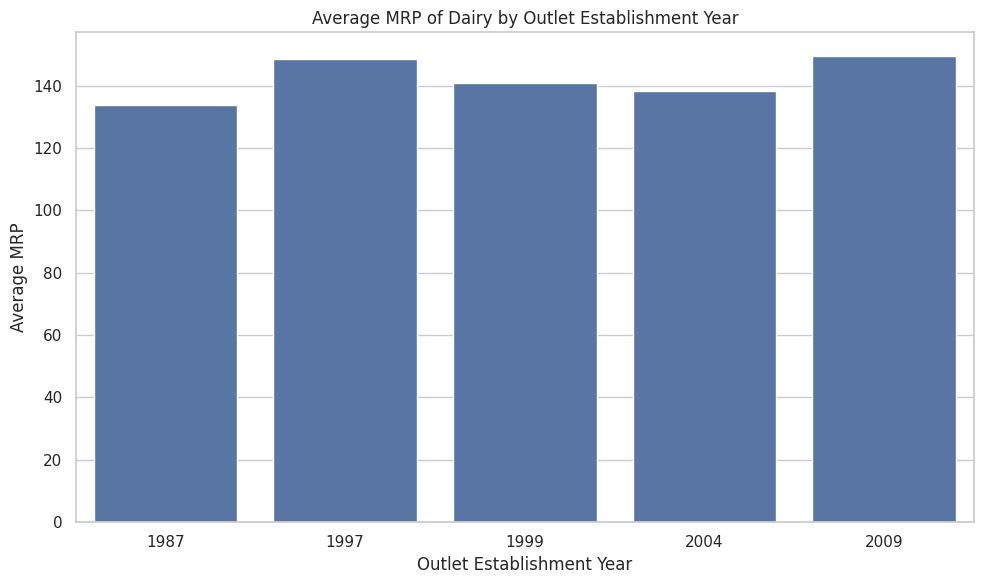

In [83]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))

sns.barplot(
    data=filtered_df,
    x='Outlet_Establishment_Year',
    y='Item_MRP',
    estimator='mean',
    ci=None
)

plt.title('Average MRP of Dairy by Outlet Establishment Year')
plt.xlabel('Outlet Establishment Year')
plt.ylabel('Average MRP')
plt.tight_layout()
plt.show()

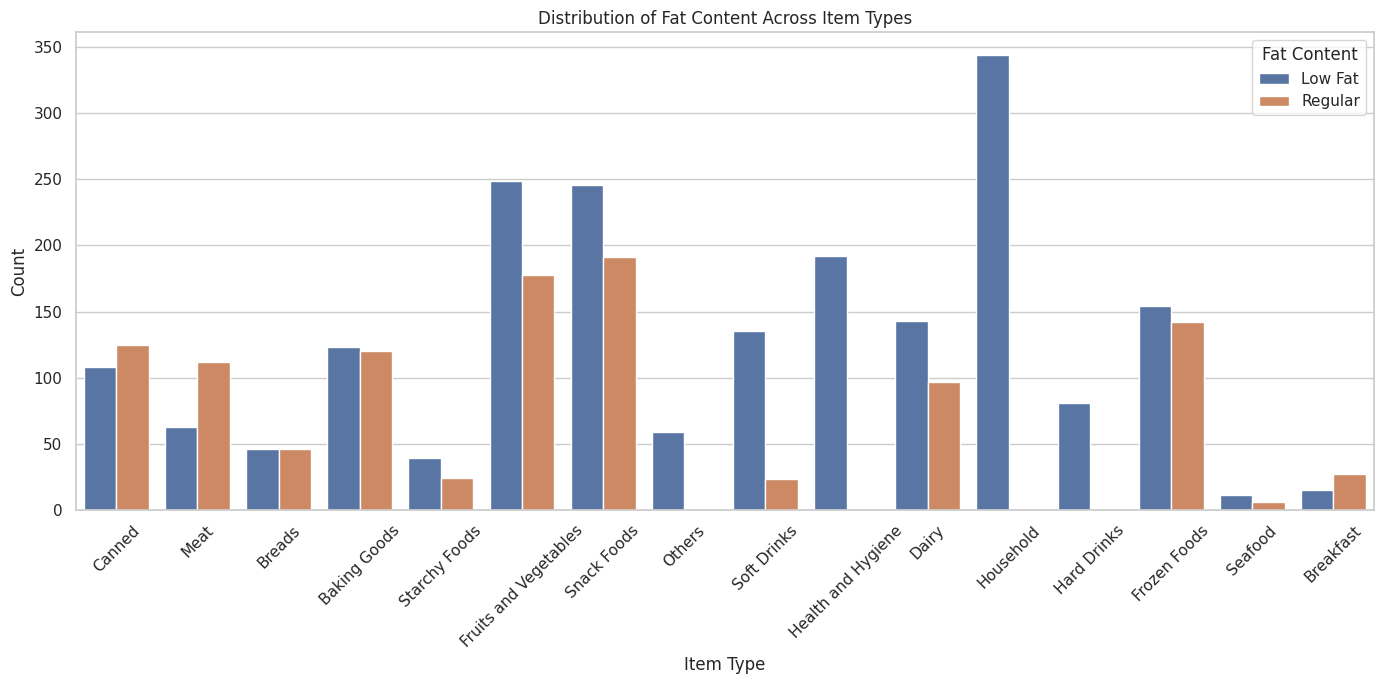

In [84]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14, 7))

# Countplot to show Fat Content per Item Type
sns.countplot(data=df, x='Item_Type', hue='Item_Fat_Content')

plt.title('Distribution of Fat Content Across Item Types')
plt.xlabel('Item Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Fat Content')
plt.tight_layout()
plt.show()

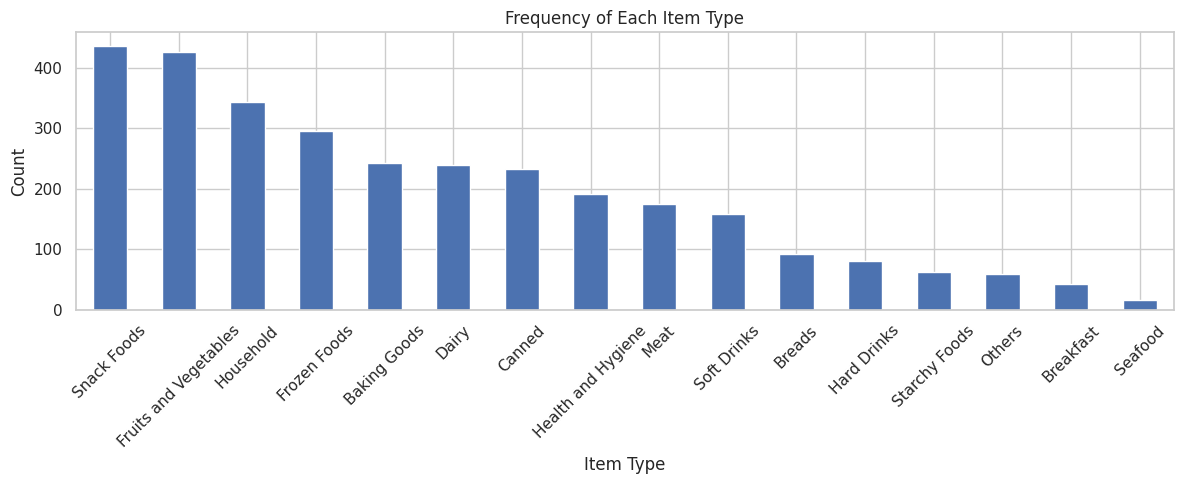

In [85]:
plt.figure(figsize=(12, 5))
df['Item_Type'].value_counts().plot(kind='bar')
plt.title('Frequency of Each Item Type')
plt.xlabel('Item Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

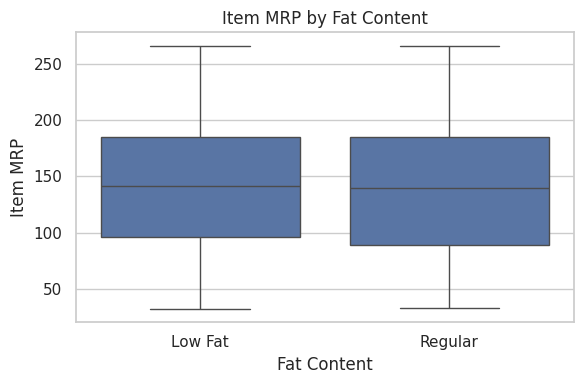

In [86]:
plt.figure(figsize=(6, 4))
sns.boxplot(x='Item_Fat_Content', y='Item_MRP', data=df)
plt.title('Item MRP by Fat Content')
plt.xlabel('Fat Content')
plt.ylabel('Item MRP')
plt.tight_layout()
plt.show()

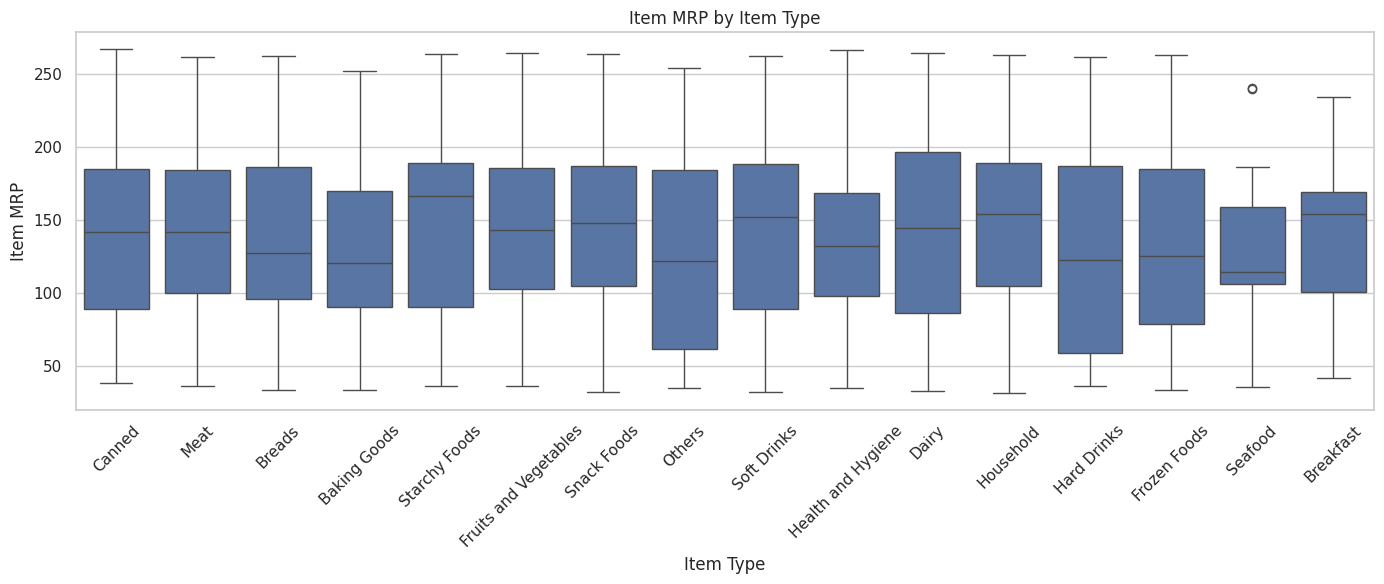

In [87]:
plt.figure(figsize=(14, 6))
sns.boxplot(x='Item_Type', y='Item_MRP', data=df)
plt.title('Item MRP by Item Type')
plt.xlabel('Item Type')
plt.ylabel('Item MRP')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

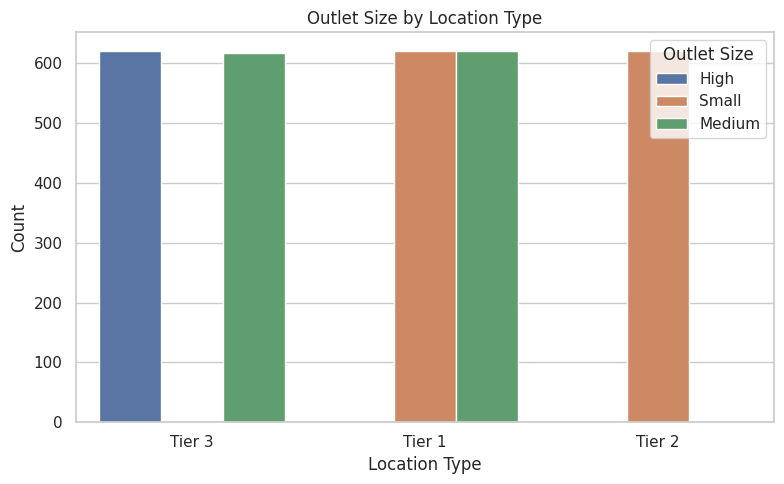

In [88]:
plt.figure(figsize=(8, 5))
sns.countplot(x='Outlet_Location_Type', hue='Outlet_Size', data=df)
plt.title('Outlet Size by Location Type')
plt.xlabel('Location Type')
plt.ylabel('Count')
plt.legend(title='Outlet Size')
plt.tight_layout()
plt.show()

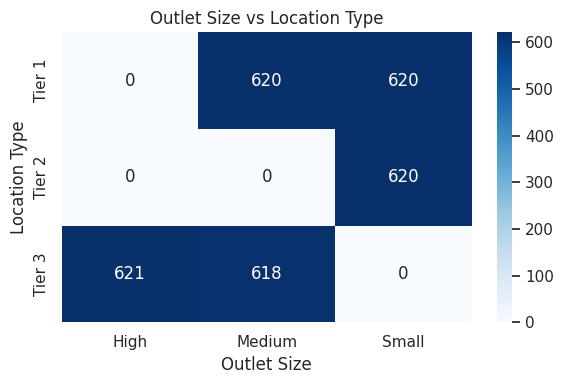

In [89]:
ct = pd.crosstab(df['Outlet_Location_Type'], df['Outlet_Size'])

plt.figure(figsize=(6, 4))
sns.heatmap(ct, annot=True, cmap='Blues', fmt='d')
plt.title('Outlet Size vs Location Type')
plt.ylabel('Location Type')
plt.xlabel('Outlet Size')
plt.tight_layout()
plt.show()

**Copied data for further analysis**

In [90]:
df_copy = df.copy()

In [99]:
df.columns

Index(['Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_Type',
       'Item_MRP', 'Outlet_Identifier', 'Outlet_Establishment_Year',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

In [92]:
df_copy.drop('Item_Type',axis=1,inplace=True)

In [100]:
df_copy.drop('Item_Weight',axis=1,inplace=True)

In [101]:
df_copy.drop('Item_MRP',axis=1,inplace=True)

In [102]:
df_copy.drop('Item_Visibility',axis=1,inplace=True)

In [103]:
df_copy.drop('Outlet_Establishment_Year',axis=1,inplace=True)

In [93]:
df_copy['Outlet_Location_Type'].replace({
    'Tier 1': 1,
    'Tier 2': 2,
    'Tier 3': 3
},inplace=True)

/tmp/ipython-input-3145185587.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_copy['Outlet_Location_Type'].replace({
/tmp/ipython-input-3145185587.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_copy['Outlet_Location_Type'].replace({


In [94]:
df_copy['Outlet_Size'].replace({
    'High': 3,
    'Small': 1,
    'Medium':2,
},inplace=True)

/tmp/ipython-input-86650581.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_copy['Outlet_Size'].replace({
/tmp/ipython-input-86650581.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_copy['Outlet_Size'].replace({


In [95]:
df_copy['Item_Fat_Content'].replace({
    'Low Fat': 1,
    'LF': 1,
    'Regular': 2,
    'low fat': 1,
    'reg': 2,
},inplace=True)

/tmp/ipython-input-939270843.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_copy['Item_Fat_Content'].replace({
/tmp/ipython-input-939270843.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_copy['Item_Fat_Content'].replace({


In [96]:
df_copy['Outlet_Type'].replace({
    'Supermarket Type1': 1,
    'Supermarket Type2': 2,
},inplace=True)

/tmp/ipython-input-1650690249.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_copy['Outlet_Type'].replace({
/tmp/ipython-input-1650690249.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_copy['Outlet_Type'].replace({


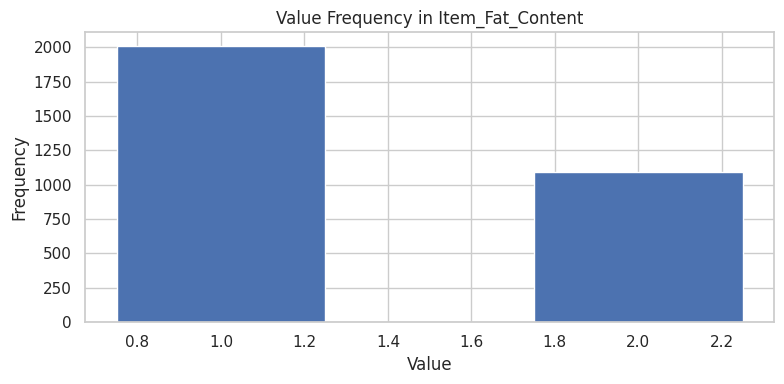

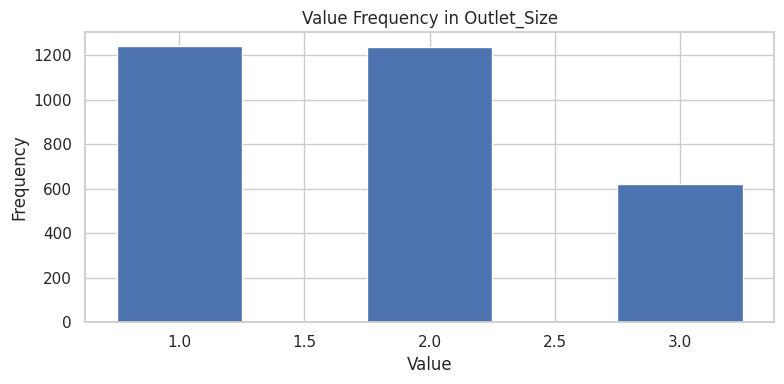

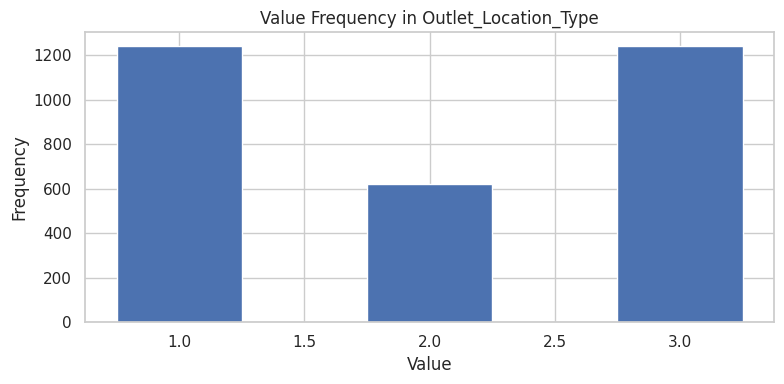

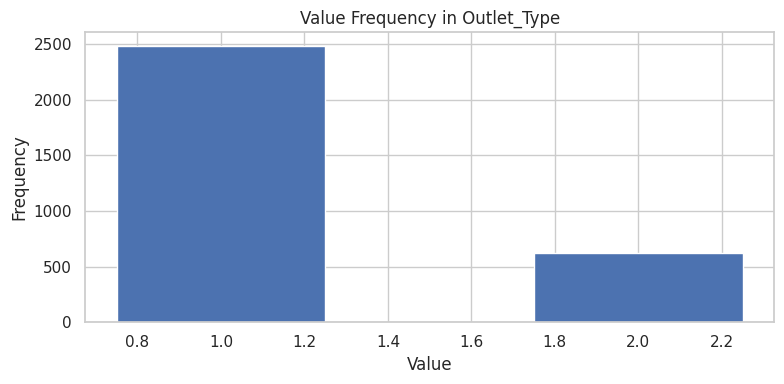

In [104]:
import matplotlib.pyplot as plt

# Only using numeric columns
numeric_df = df_copy.select_dtypes(include='number')

# Plot value counts for each column
for column in numeric_df.columns:
    value_counts = numeric_df[column].value_counts().sort_index()

    plt.figure(figsize=(8, 4))
    plt.bar(value_counts.index, value_counts.values, width=0.5)
    plt.title(f"Value Frequency in {column}")
    plt.xlabel("Value")
    plt.ylabel("Frequency")
    plt.tight_layout()
    plt.show()

# Conclusion

The dataset, initially containing 5,681 rows and 11 columns, was cleaned to 3,099 rows and 10 columns. EDA revealed that Dairy item MRPs peaked in 1997 and were lowest in 1987, with dips in 1999 and 2004 before rising in 2009. Snack Foods are the most common item type, suggesting high demand, while Seafood is least common; Starchy Foods and Household goods have slightly higher prices. Low Fat products dominate over Regular, small and medium outlets are equally prevalent while high-size outlets are rare, and Tier 2 locations have the fewest outlets compared to Tier 1 and Tier 3. Supermarket Type 1 is more common than Type 2. Business implications include prioritizing Snack Foods in inventory, positioning Starchy Foods and Household items as premium products, tailoring marketing for small and medium outlets, exploring expansion in Tier 2 areas and high-size outlets, leveraging the health-conscious trend with Low Fat products, and considering diversification into Supermarket Type 2.
